### Mount your Google Drive into this instance of Colab
If you have not already done so, install Google Drive for Desktop on your machine and create a folder in your Google Drive called "Github". Then run the cell below. Then use GitHub Desktop or other approach to clone the class repository into that folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/


/content/drive/MyDrive/Github


### After mounting Google Drive (and cloning the repository if needed), cd to your Github folder on Google Drive

In [3]:
%cd 'soil-physics-theory'


/content/drive/MyDrive/Github/soil-physics-theory


In [4]:
%cd 'content/chapter-4'

/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-4


### Install required modules

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *

### 4.1 At what temperature is the thermal conductivity of wet soil independent of water content?

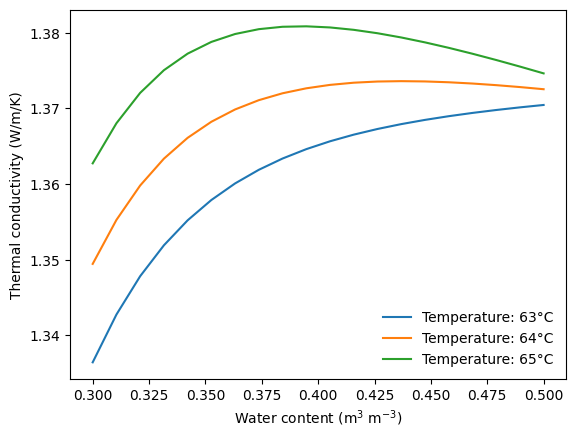

In [6]:
from PSP_heatSoil import thermalConductivity
# Define parameters
bulkDensity = 1300.  # kg/m^3
clay = 0.40  # clay content of soil (g/g)
waterContents = np.linspace(0.3, 0.5, 20)  # Vary water content from 30% to 50%
temperatures = range(63, 66, 1)  # Temperature range from 63°C to 66°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m$^3$ m$^{-3}$)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

At 64°C, the thermal conductivity of a soil with a bulk density of 1300 kg m$^{-3}$ and clay content of 40% is approximately independent of soil water contents between 0.35 and 0.50 m$^3$ m$^{-3}$. This occurs because at this temperature the thermal conductivity of the gas phase is approximately equal to that of the liquid phase.

### 4.2 What is the possible range of volumetric specific heat in mineral soils?

The minimum value will occur when bulk density and soil water content are at their minimum values, which for mineral soils could be a bulk density of 950 kg m$^{-3}$ and soil water content of 0.00 m$^3$ m$^{-3}$.

In [7]:
from PSP_heatSoil import heatCapacity

bulkDensity = 950. # kg m^-3
waterContent = 0.00 # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The minimum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The minimum heat capacity is approximately 0.860 MJ/m^3/K.


The maximum value will occur when bulk density is minimum and soil water content is maximum, which for mineral soils could be a bulk density of 950 kg m$^{-3}$ and soil water content equal to the porosity.

In [8]:
porosity = 1 - bulkDensity/2650 # m^3 m^-3
waterContent = porosity # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The maximum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The maximum heat capacity is approximately 3.542 MJ/m^3/K.


### 4.3a What effect would a surface residue mulch have on soil temperature?

Soil temperatures for a bare soil surface without surface residue mulch. Calculations were performed using the finite difference solver with a soil water content of 0.20, a mean temperature of 15$^o$C, an amplitude of 10$^o$C at the soil surface, and a weighting factor of 0.6 for time discretization, simulating for 48 hours.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


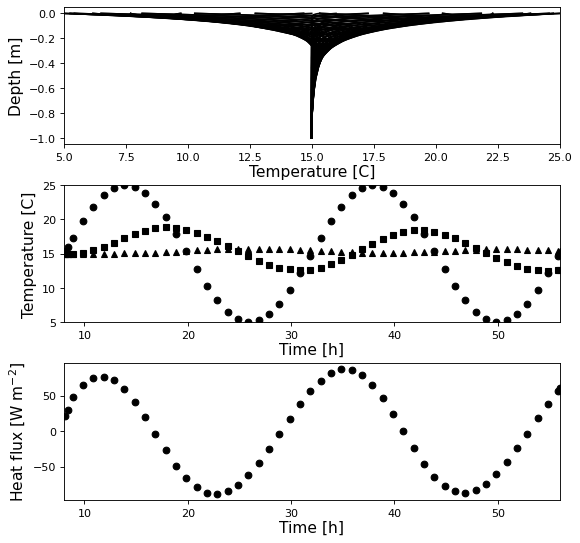

In [13]:
from main2 import main
bulkDensity = 1000. # kg/m3
clay = 0.00 # g/g
main(bulkDensity, clay)


Soil temperatures for a soil surface covered with surface residue mulch. Calculations were performed using the finite difference solver with a soil water content of 0.20, a mean temperature of 15$^o$C, an amplitude of 5$^o$C at the soil surface, and a weighting factor of 0.6 for time discretization, simulating for 48 hours.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 5
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 1
nr of simulation hours: 48
nr of iterations per hour: 1.0625


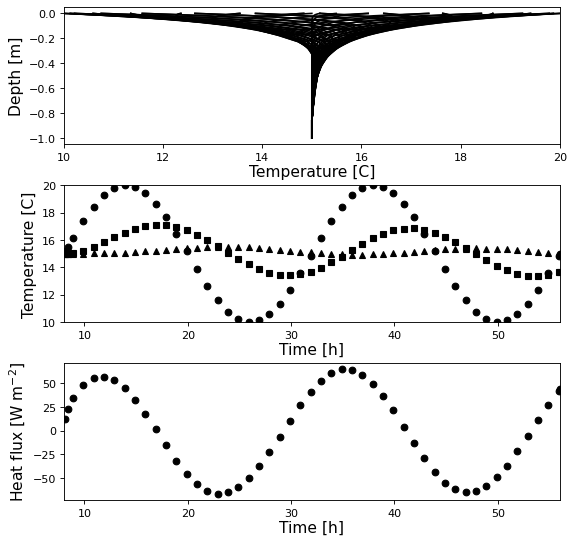

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py

### The presence of the surface residue mulch would reduce the amplitude of the soil temperature wave and also reduce the soil heat flux.

### 4.3b At what depth are temperature changes 180 degrees out of phase with the surface temperature?

The figure above shows that at the 0.3 m depth (triangles), the soil temperature is approximately 180 degrees out of phase with the surface temperature.

### 4.4a Modify the program PSP_heat.py so that it allows water content to change with depth. Then compare simulations for a uniform, dry soil with simulations of a moist soil with a dry dust mulch on the surface.

I assumed a water content of 0.05 m$^3$ m$^{-3}$ to represent the uniform dry soil. I used a mean temperature of 15°C and amplitude of 10°C.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.05
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


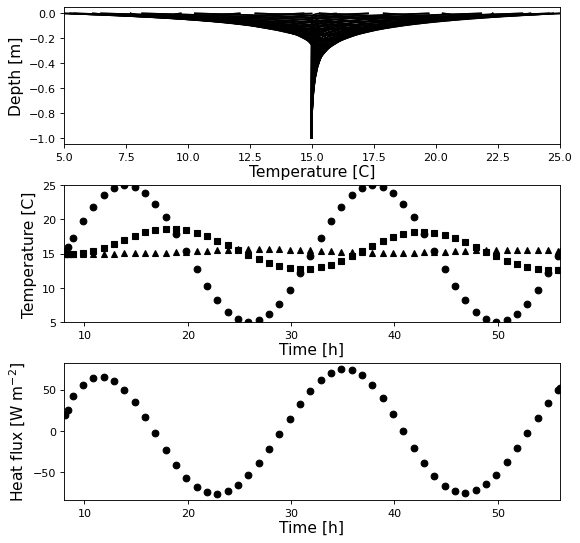

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py

For the next simulation, I assumed the soil surface water content was 0.05 m$^3$ m$^{-3}$, and the sub-surface water content was 0.20 m$^3$ m$^{-3}$.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?2
surface water content (m^3/m^3): 0.05
sub-surface water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


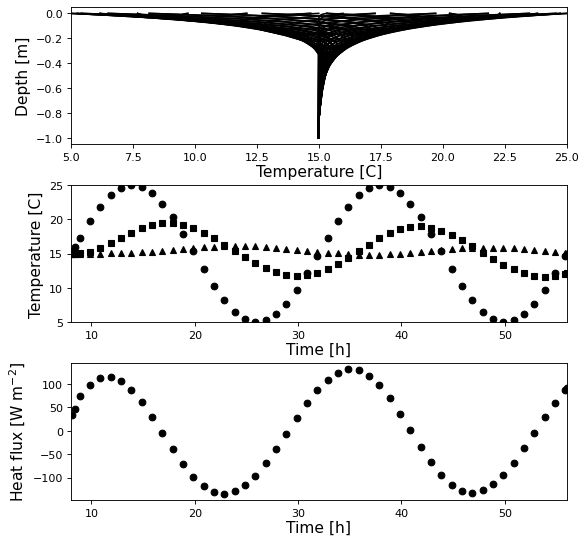

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py

Compared to the uniform dry soil, the soil with the dry surface and moist subsurface showed a larger amplitude in the soil heat flux and slightly larger amplitude in the soil temperature at the 10-cm depth (black squares).

### 4.5 Modify the program main.py to print on screen soil temperatures at 0.15 and 0.3 m depths.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
time [hr], T @ 0.15 m, T @ 0.30 m,

8.125,15.000,15.000,

8.375,15.000,15.000,

8.875,15.001,15.000,

9.875,15.028,15.000,

10.875,15.116,15.001,

11.875,15.292,15.002,

12.875,15.561,15.007,

13.875,15.906,15.017,

14.875,16.296,15.034,

15.875,16.690,15.061,

16.875,17.046,15.099,

17.875,17.327,15.147,

18.875,17.506,15.206,

19.875,17.569,15.272,

20.875,17.514,15.343,

21.875,17.347,15.413,

22.875,17.085,15.480,

23.875,16.746,15.538,

24.875,16.353,15.585,

25.875,15.928,15.618,

26.875,15.494,15.635,

27.875,15.072,15.637,

28.875,14.684,15.623,

29.875,14.349,15.595,

30.875,14.087,15.554,

31.875,13.913,15.504,

32.875,13.842,15.447,

33.875

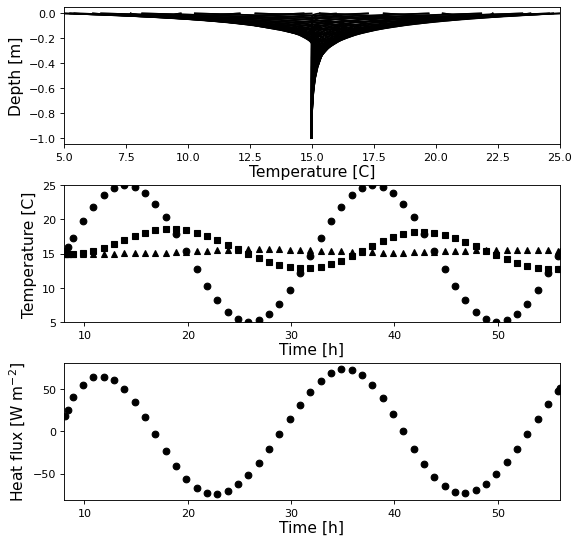

<Figure size 640x480 with 0 Axes>

In [ ]:
run main3.py

### 4.6 Modify the values of clay content and bulk density in the program PSP_soil.py and investigate the effects of these variables on soil temperature. Compare simulations for a sand, a silt loam, and a clay soil and for a compacted soil (ρ$_b$ = 1500 kg m$^{-3}$) and a recently tilled soil (ρ$_b$ = 900 kg m$^{-3}$) .

The problem should actually refer to PSP_heatSoil.py, not PSP_soil.py. To simulate for sand, I set the bulk density to 1500 kg m$^{-3}$ and the clay content to 0%.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


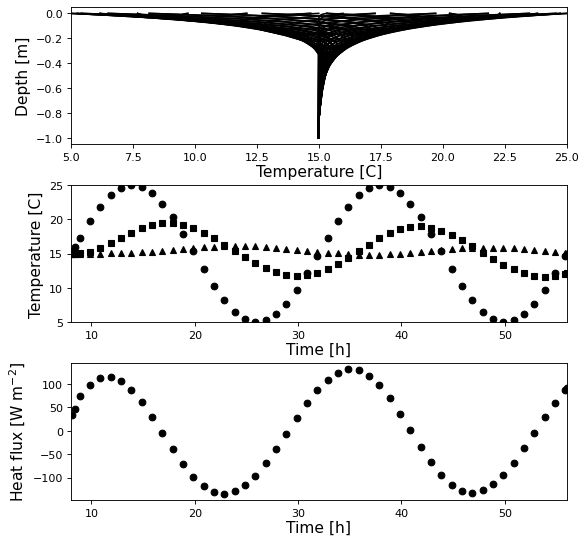

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.00 # g/g
from main2 import main
main(bulkDensity, clay)

To simulate for silt loam, I set the bulk density to 1500 kg m$^{-3}$ and the clay content to 10%.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


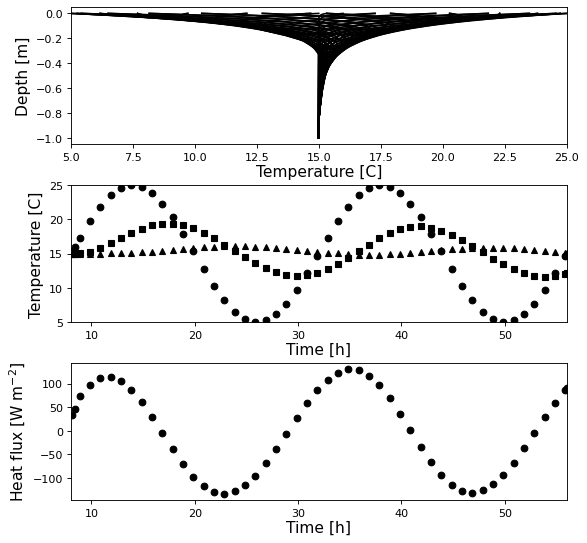

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.10 # g/g
main(bulkDensity, clay)

To simulate for clay, I set the bulk density to 1500 kg m$^{-3}$ and the clay content to 60%.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


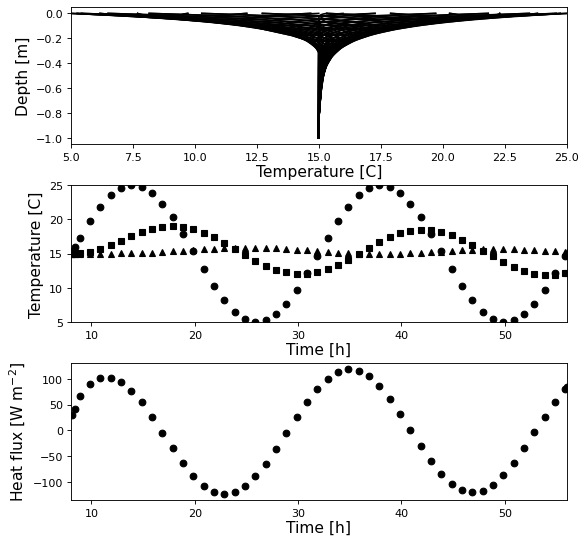

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.60 # g/g
main(bulkDensity, clay)

The prior simulation represents a compacted soil. To simulate for recently tilled soil, I set the bulk density to 900 kg m$^{-3}$ and the clay content to 60%.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


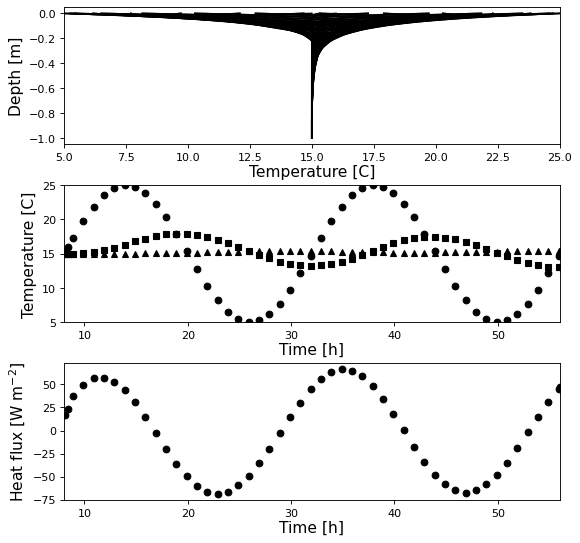

In [ ]:
bulkDensity = 900. # kg/m3
clay = 0.60 # g/g
main(bulkDensity, clay)


Changing the clay content, while keeping the bulk density and water content the same, had no discernible impact on the simulated soil temperatures or heat flux values. Reducing the bulk density from 1500 kg m$^{-3}$ to 900 kg m$^{-3}$ led to decreased temperature wave amplitudes in the subsurface, delayed temperature peaks in the subsurface, and reduced heat flux.

### 4.7 Modify the program PSP_heat.py and investigate the effects of explicit Euler, implicit Euler, and Crank-Nicolson numerical solutions.

The explicit Euler solution is used when the time discretization weighting factor is set to 0.

In [ ]:
main(bulkDensity, clay)

The explicit Euler solution failed to converge.

To run the implicit Euler solution, set the time discretization weight factor to 1.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 1
nr of simulation hours: 48
nr of iterations per hour: 1.0625


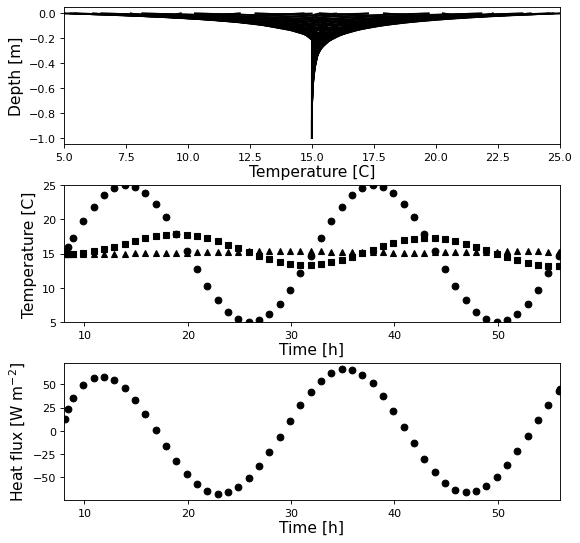

In [ ]:
main(bulkDensity, clay)

The implicit Euler solution converged and took 31 s to complete the simulation.

To run the Crank-Nicholson solution, set the time discretization weighting factor to 0.5.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.5
nr of simulation hours: 48
nr of iterations per hour: 1.0625


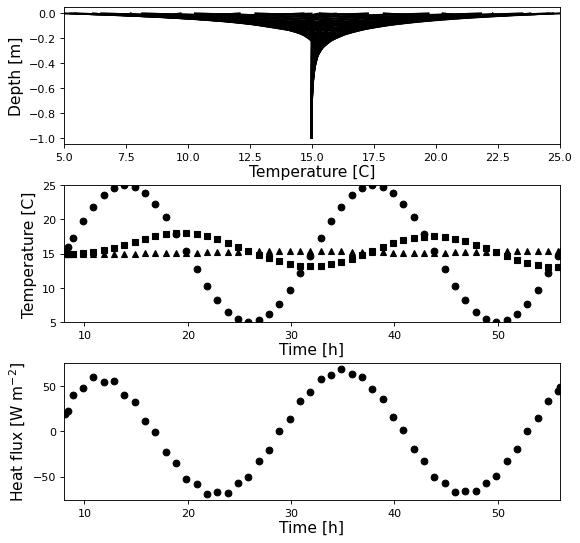

In [ ]:
main(bulkDensity, clay)

The Crank-Nicholson solution converged and completed the simulation in 32 s, but there are some irregularities in the soil heat flux values, which do not change smoothly with time.

### When you are finished coding, commit and push your changes to the remote repository using GitHub Desktop or other approach.